In [1]:
import pandas as pd
import numpy as np
import os
from test_class import Test
os.environ['PYTHONHASHSEED'] = str(50)
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
rounds = 50
dataset = pd.read_csv('RTT_data.csv')
data_args = {
    'data seed': 11,
    'distance clients': [0, 2, 3, 6],
    'distance augments': [0.5, 0.5, 0.5, 0.5],
    'tolerance': 5,
    'exclude dtypes': 'object',
    'drop labels': ['GroundTruthRange[m]'],
    'target labels': ['GroundTruthRange[m]'],
    'test size 1': 0.2,
    'test size 2': 0.25
}
Mt = (np.ones(rounds) * 5).astype('int32')

In [3]:
model_seed = 50
test = Test(dataset, data_args, Mt, model_seed)
test.split(scheme = 1, args = (2, 5))

In [4]:
test.display_metadata()

Number of samples: 29581
Features per sample: 10

Columns:
%Timestamp[s], GroundTruthPositionX[m], GroundTruthPositionY[m], GroundTruthPositionZ[m], ML_range_estimate[m], AP_positionX[m], AP_positionY[m], AP_positionZ[m], AP_index, ToD_factor[m]

Clients: 10
Total Client Training Samples: 17748 (60.00%)
Total Client Training Labels: 17748
Total Validation Samples: 5917 (20.00%)
Total Validation Labels: 5917
Total Test Samples: 5916 (20.00%)
Total Test Labels: 5916


In [5]:
test.display_client_distribution()

Data Distribution
Client 1: 1.27%
Client 2: 0.67%
Client 3: 16.08%
Client 4: 23.99%
Client 5: 4.30%
Client 6: 2.22%
Client 7: 0.19%
Client 8: 23.76%
Client 9: 21.69%
Client 10: 5.82%

Distance Distribution w.r.t. Max Distance
Client 1: 68.42%
Client 2: 1.13%
Client 3: 84.83%
Client 4: 100.00%
Client 5: 24.36%
Client 6: 28.14%
Client 7: 58.71%
Client 8: 28.25%
Client 9: 54.60%
Client 10: 49.32%


In [6]:
len(test.fed.clients_X)

10

In [7]:
w, b, fedavg_test_mse, fedavg_log = test.run_fedavg_test(rounds = 50, frac_clients = (5/len(test.fed.clients_X)))

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [8]:
test.average_error((w, b), 0)

Avg Error: 2.39352400198575


In [21]:
w, b, conf_mse, conf_log = test.run_confeddi_test(1000, 0.1, rounds = 50, context = [0])

Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50


In [22]:
test.average_error((w, b), 0)
# 2.212949001016644

Avg Error: 4.283195119392448


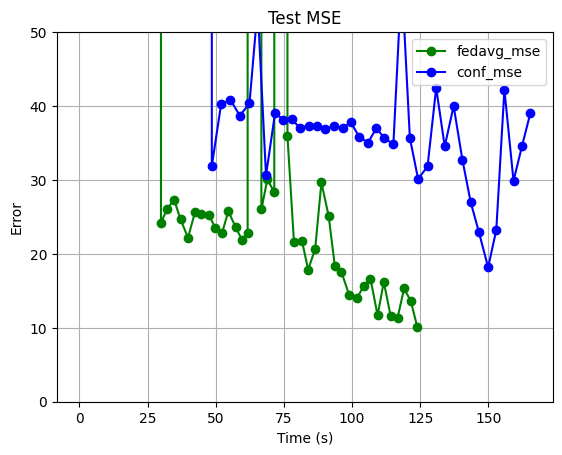

In [23]:
test.plot_error([(fedavg_log, fedavg_test_mse), (conf_log, conf_mse)], ['green', 'blue'], ['fedavg_mse', 'conf_mse'], (0, 50))

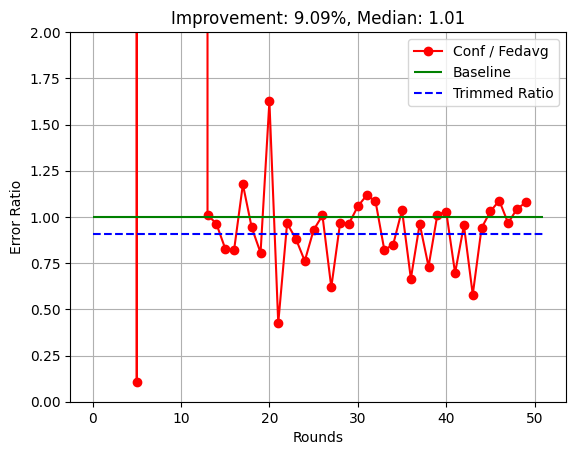

In [16]:
log_path = 'history/important baselines/fedavg_log_5.npy'
test_path = 'history/important baselines/fedavg_test_mse_5.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)
test.plot_improvement(conf_mse, ylim = (0, 2), trim_bias = 1)

In [10]:
log_path = 'history/important baselines/fedavg_log_5.npy'
test_path = 'history/important baselines/fedavg_test_mse_5.npy'
np.save(log_path, fedavg_log)
np.save(test_path, fedavg_test_mse)
test.load_baseline_fedavg_data(test_path, log_path)

In [9]:
# 7 points
a_search = np.logspace(-3, 3, 7)
l_search = np.logspace(-3, 3, 7)
test.confeddi_gs(a_search, l_search, rounds = 50, context = [0, 1, 2, 3])

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 8
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 9
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 10
Round 5
Round 10
Ro

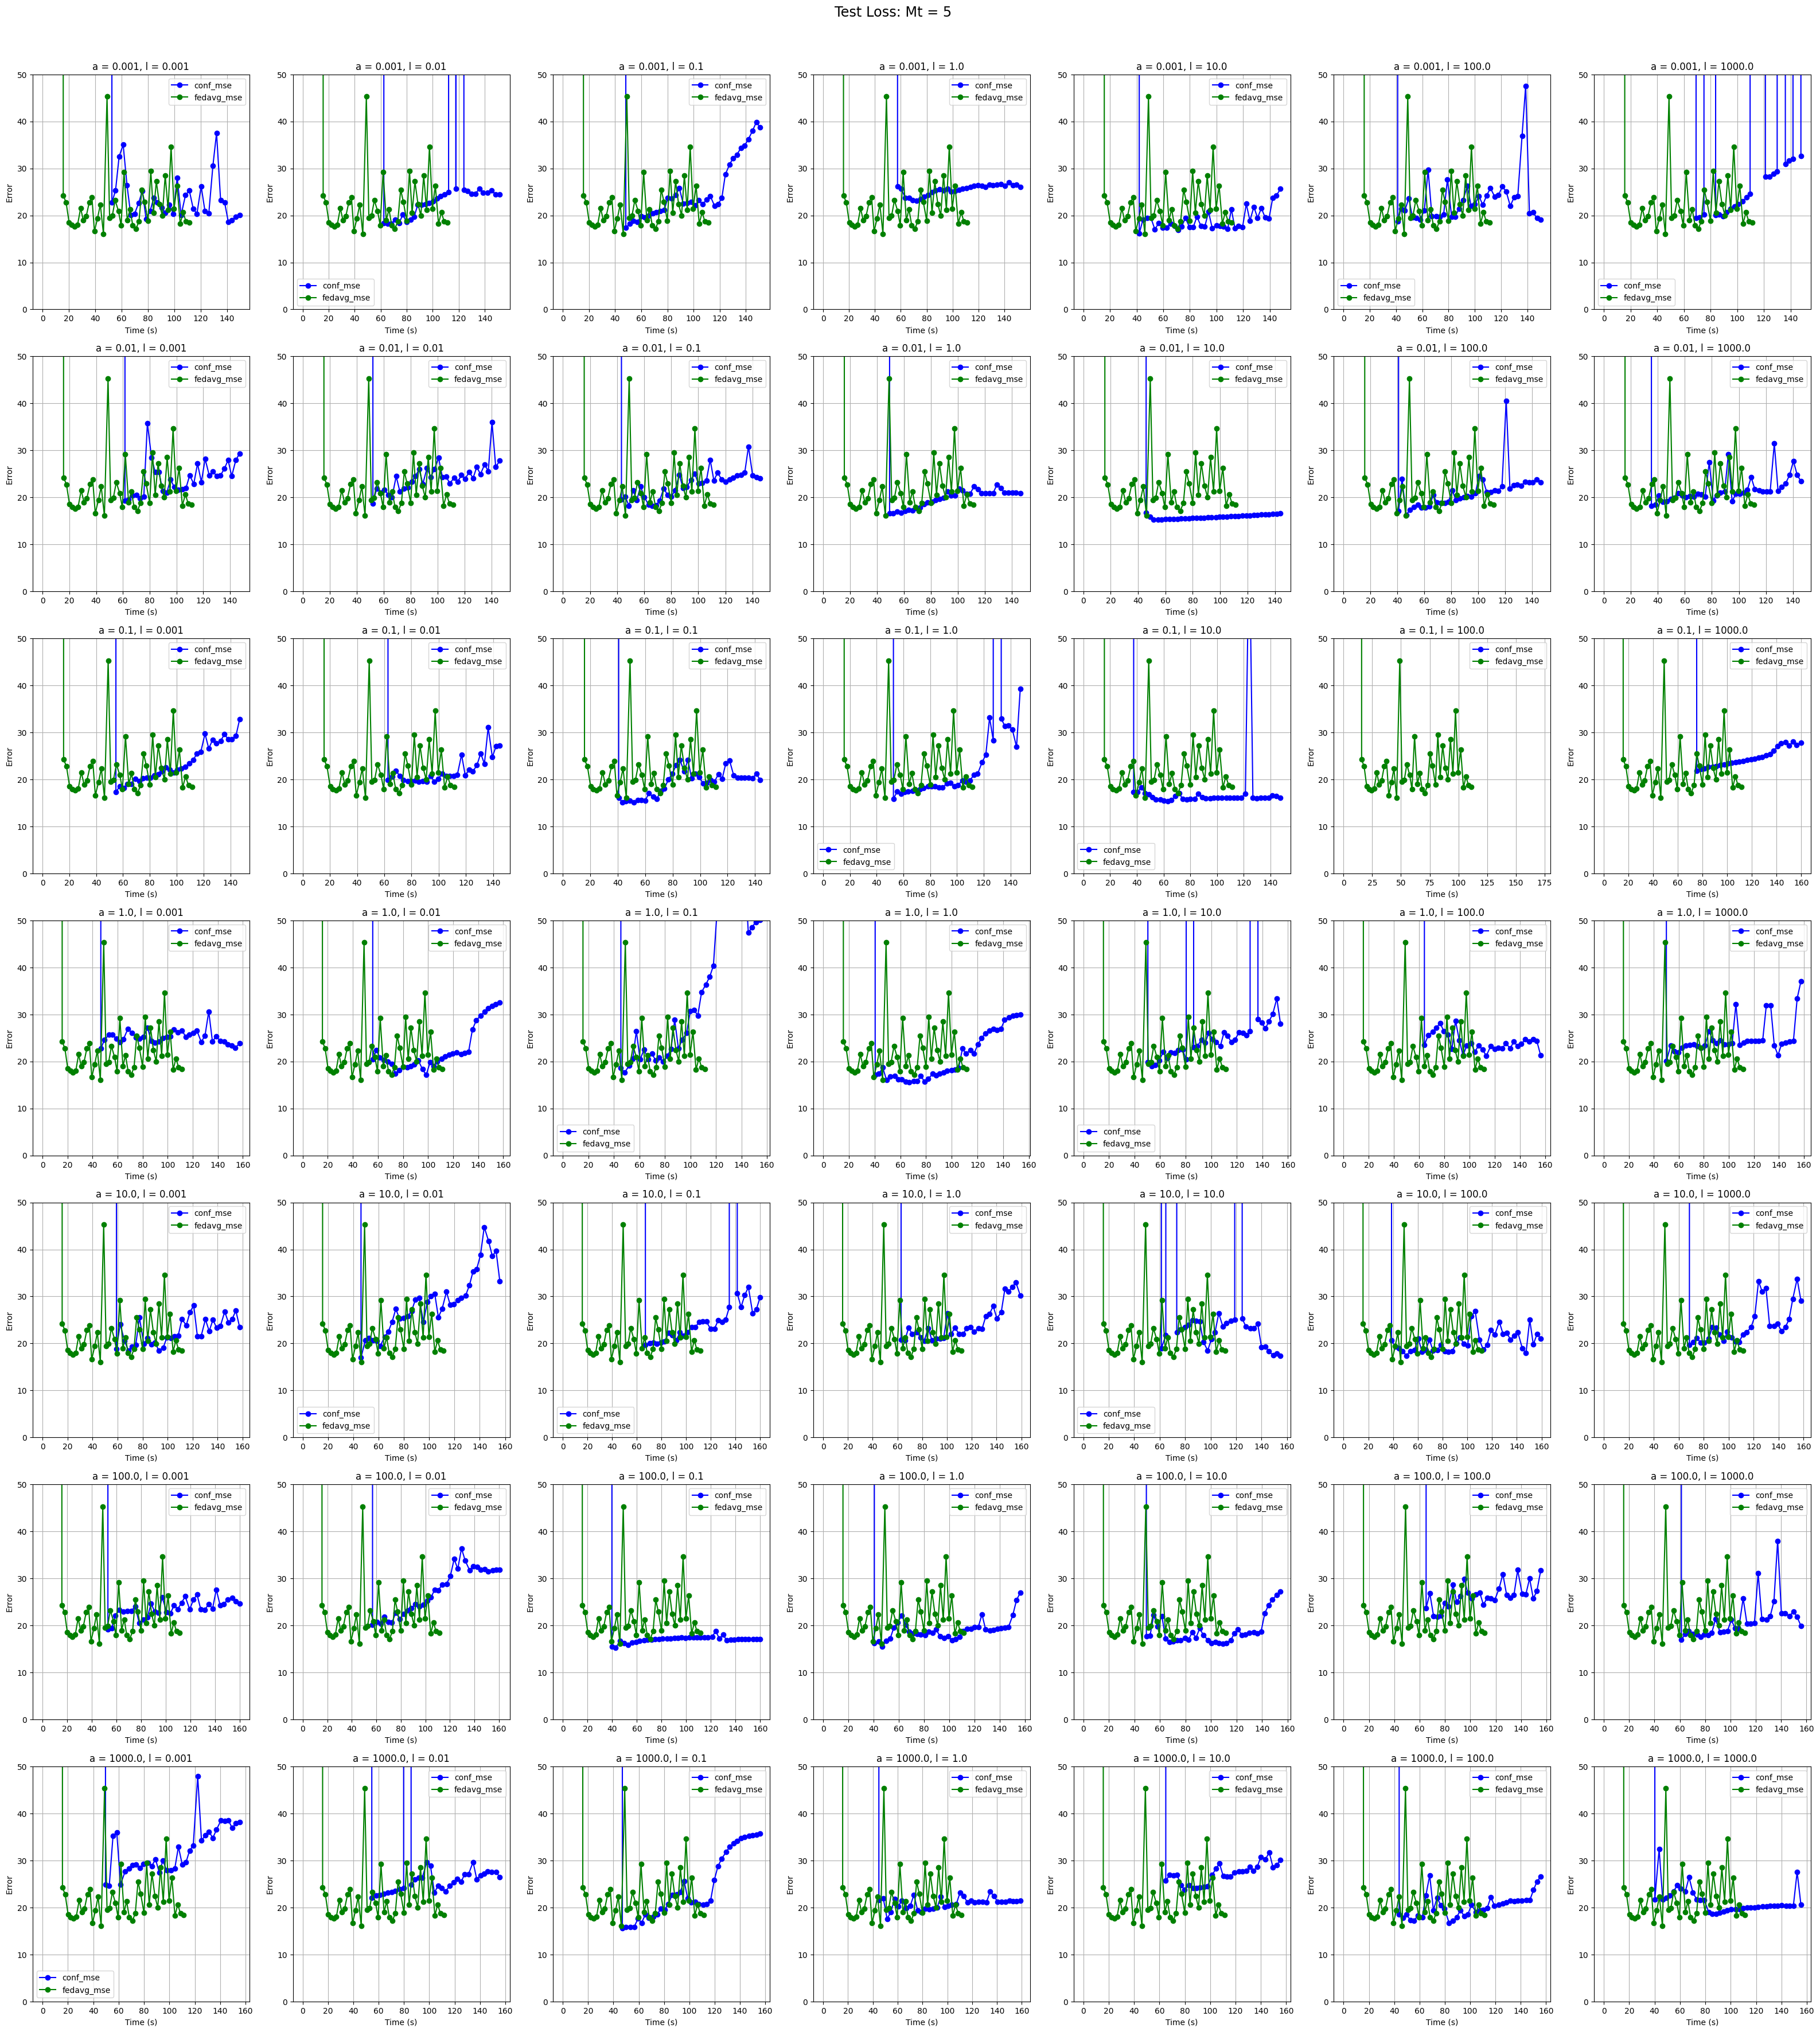

In [12]:
test.confeddi_gs_test_plots((40, 40), 0, 50)

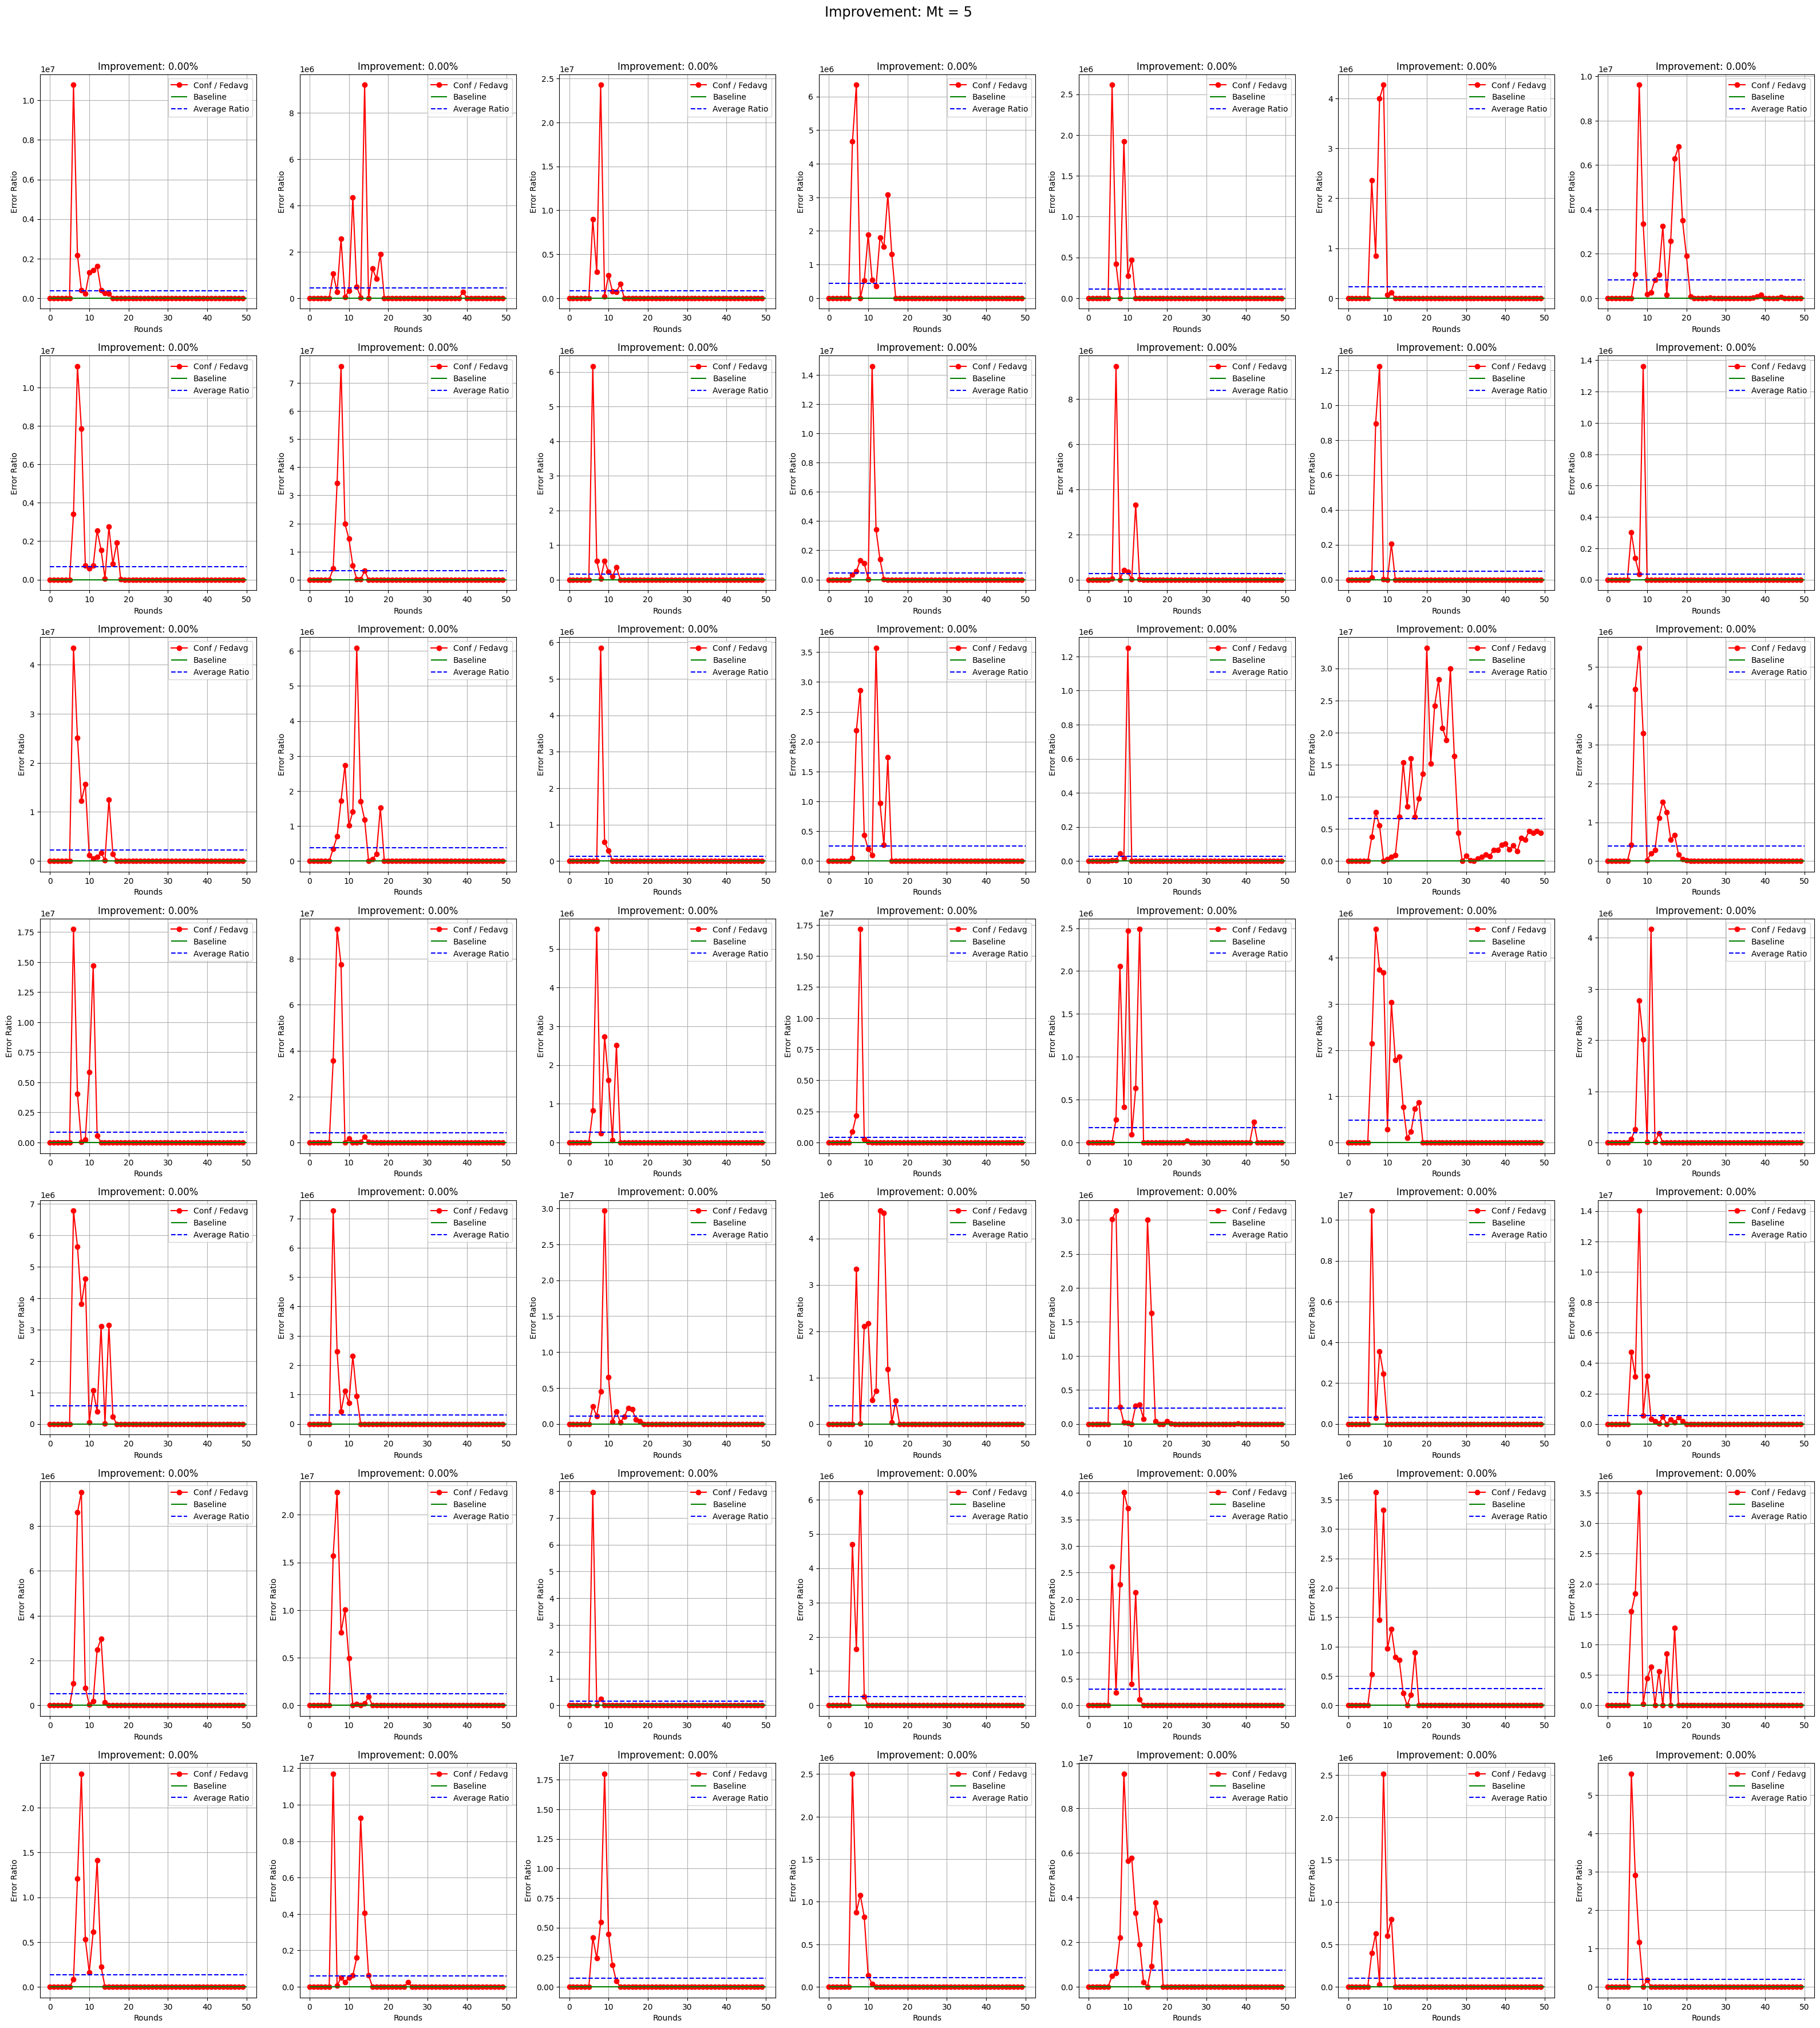

In [11]:
test.confeddi_gs_improvement_plots((40, 40))

In [10]:
context_elements = [
    [0, 1, 2, 3, 4],
    [0],
    [1],
    [4],
    [1, 2, 3, 4],
    [0, 2, 3, 4],
    [0, 1, 2, 3]
]

In [11]:
test.confeddi_as(context_elements, 0.1, 0.01, Mt = Mt, rounds = 50)

Training Model 1
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 2
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 3
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 4
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 5
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 6
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50

Training Model 7
Round 5
Round 10
Round 15
Round 20
Round 25
Round 30
Round 35
Round 40
Round 45
Round 50



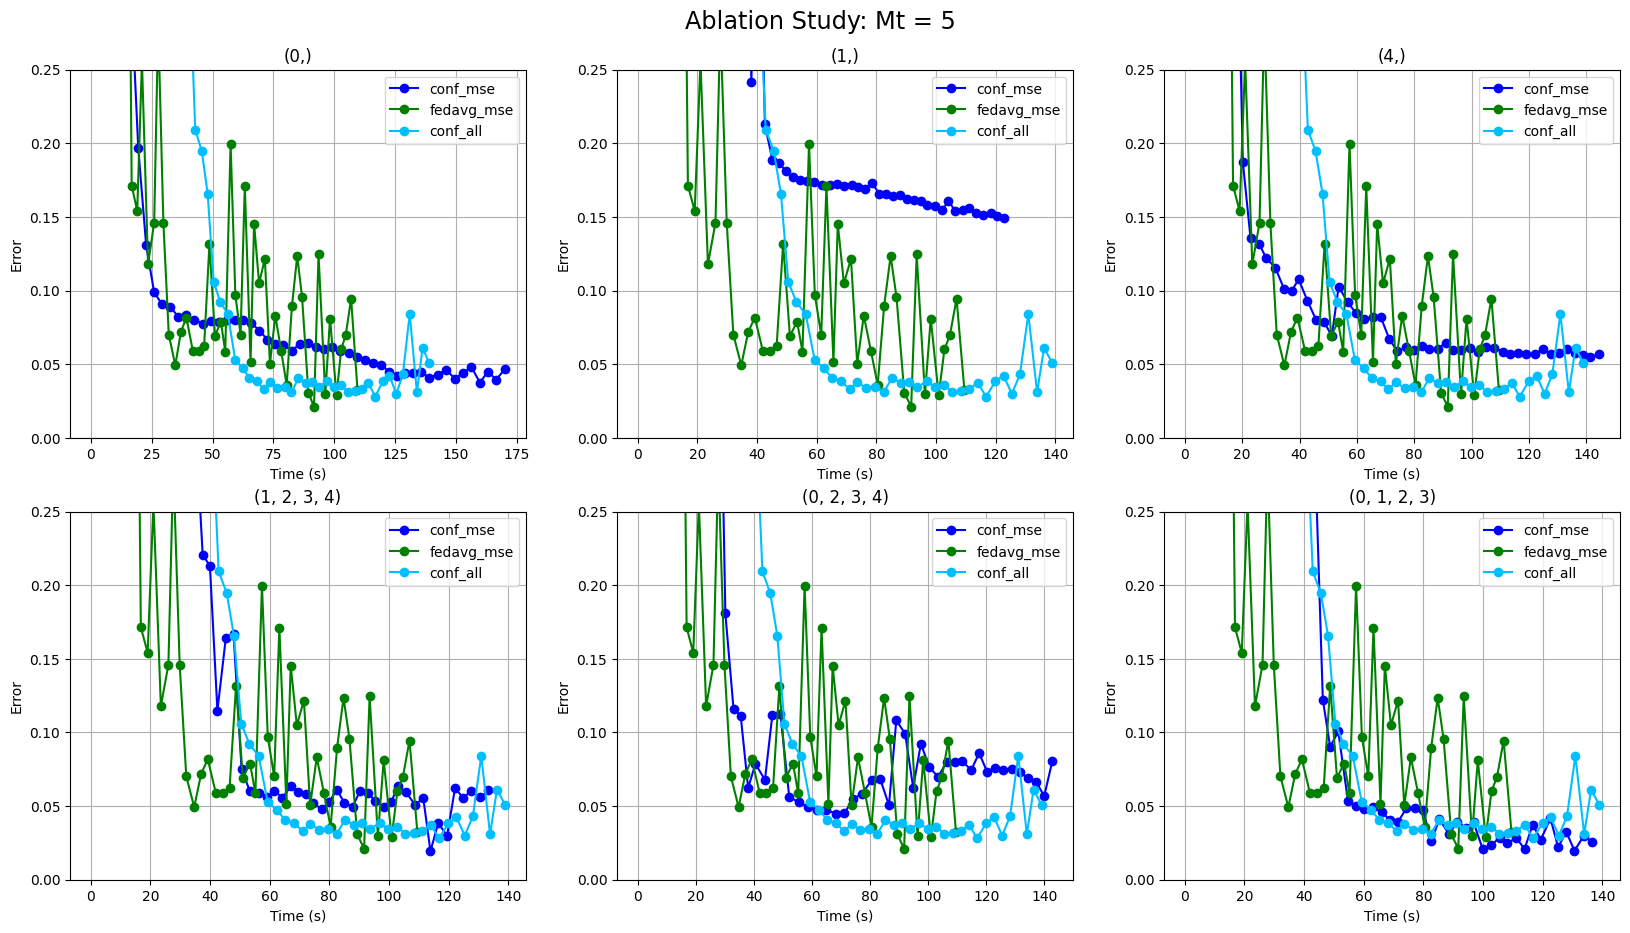

In [12]:
test.confeddi_as_test_plots((20, 10), 0, 0.25, 2, 3)

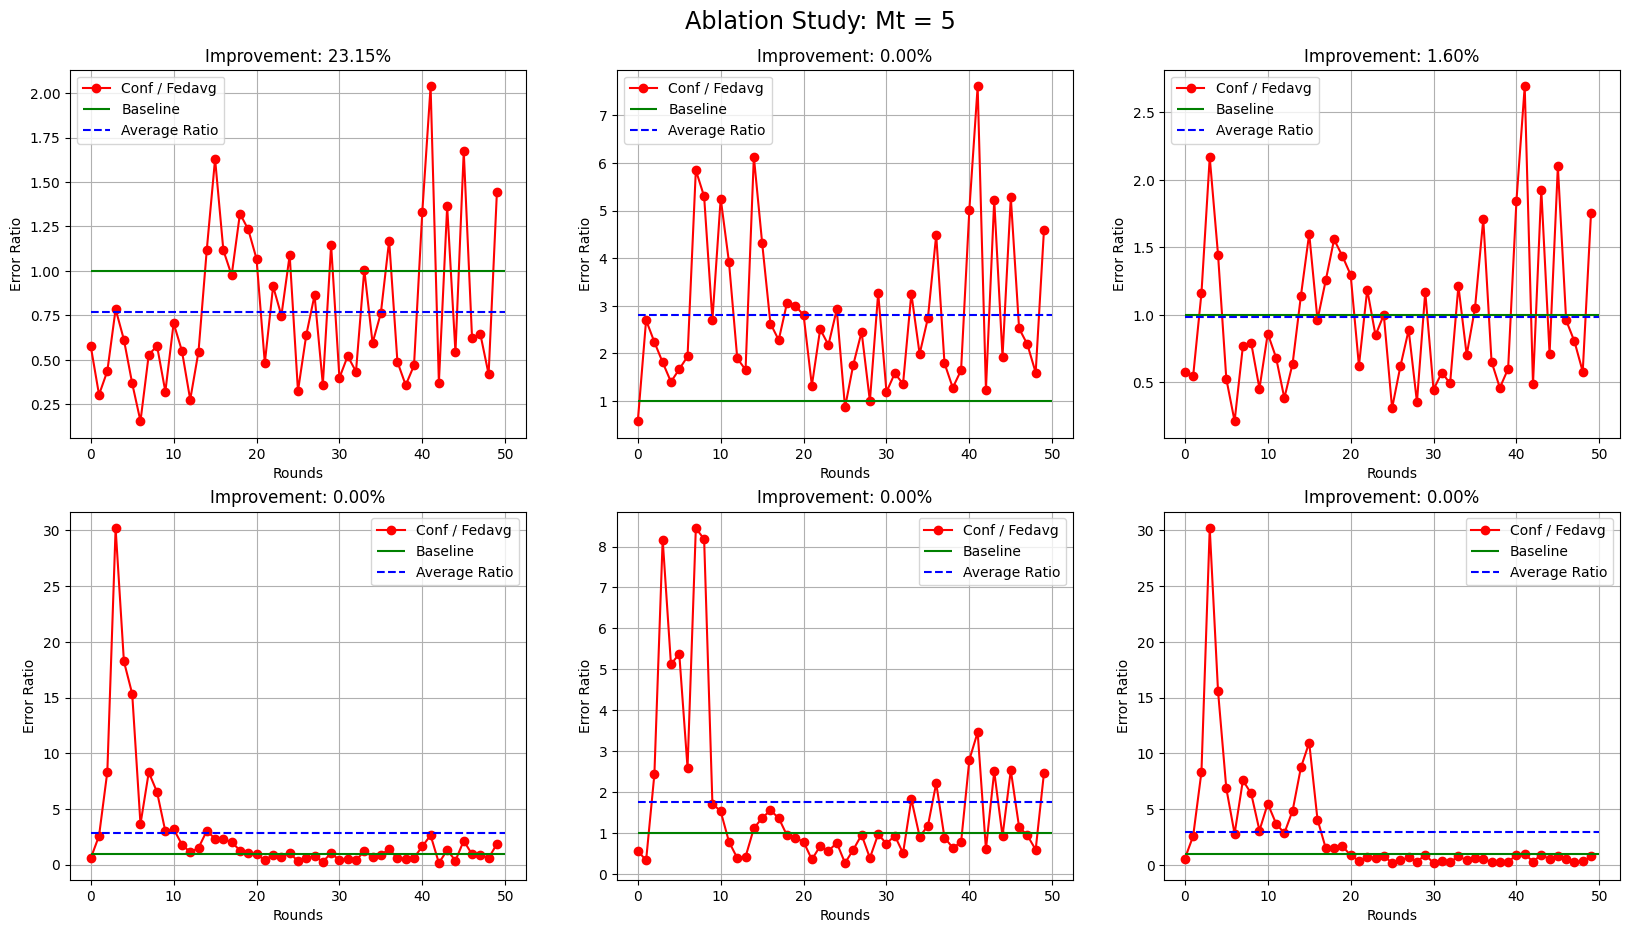

In [13]:
test.confeddi_as_improvement_plots((20, 10), 2, 3)